# FFT Image Processing Demo

In [1]:
from datasets import load_dataset
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("."))
import utils

/jet/home/tho2/.conda/envs/ImgFT/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Image size: (1024, 1024)


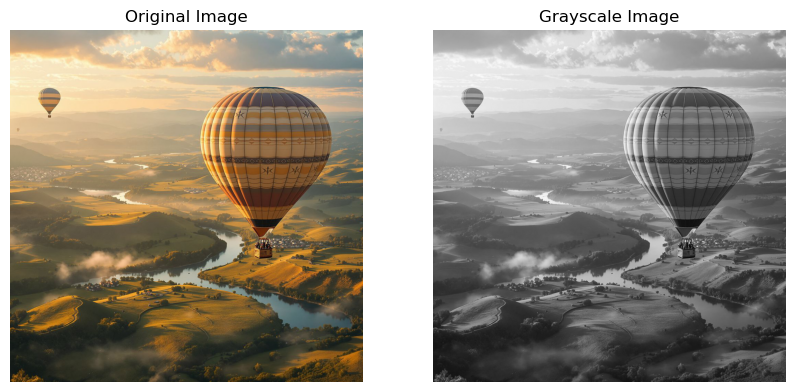

In [2]:
# Define path to a sample image
image_path = '../data/storage/spirit-zfs/fluxultra-stockphotos/images-jpg/1/0090.jpg'

# Load image
img = utils.load_image(image_path)
print(f"Image size: {img.size}")

# Convert to grayscale
gray_img = utils.to_grayscale(img)
img_array = np.array(gray_img)

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


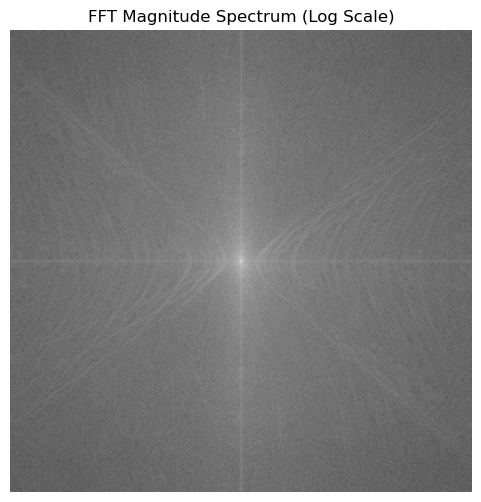

In [3]:
# Compute FFT
fft_res = utils.compute_fft(img_array)

# Normalize
fft_norm = utils.normalize_fft(fft_res)

# Visualize Magnitude Spectrum (Log scale)
fft_shifted = np.fft.fftshift(fft_norm)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1e-9)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("FFT Magnitude Spectrum (Log Scale)")
plt.axis('off')
plt.show()


In [4]:
# Get top k frequencies
k = 8192
values, positions = utils.get_top_frequencies(fft_norm, k=k)

print(f"Extracted {len(values)} frequencies.")
print(f"Values shape: {values.shape}")
print(f"Positions shape: {positions.shape}")

Extracted 8192 frequencies.
Values shape: (8192, 2)
Positions shape: (8192, 2)


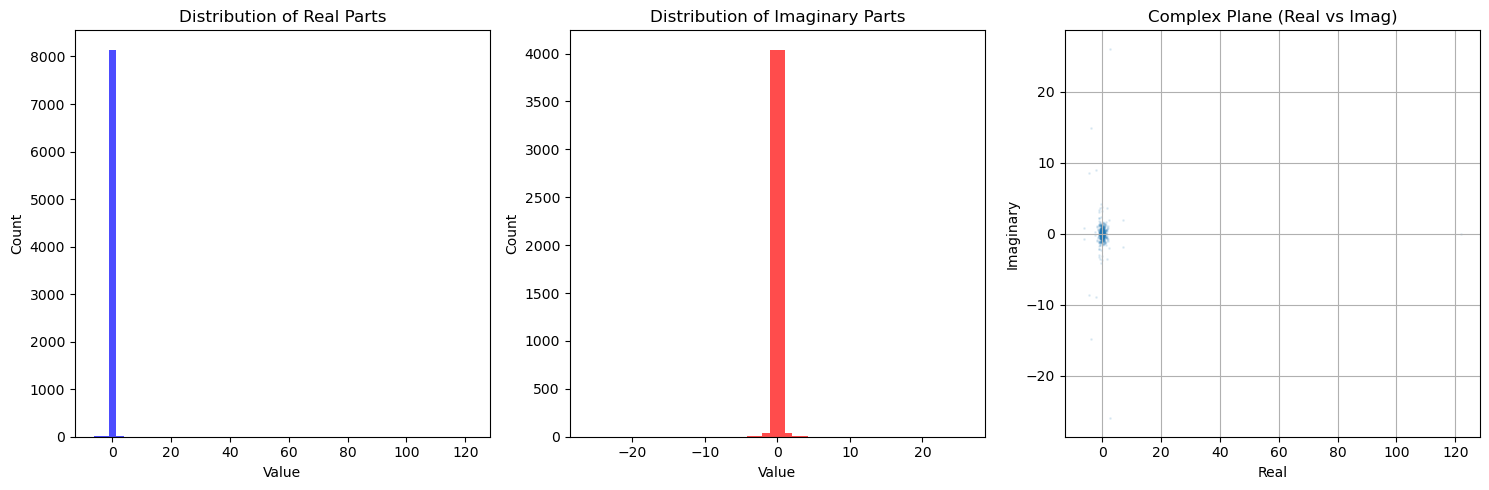

Real: mean=0.0194, std=1.3749, min=-6.2861, max=121.9646
Imag: mean=-0.0000, std=0.5707, min=-26.0212, max=26.0212


In [5]:
# Analysis of Values
real_parts = values[:, 0]
imag_parts = values[:, 1]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(real_parts, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Real Parts")
plt.xlabel("Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(imag_parts, bins=50, color='red', alpha=0.7)
plt.title("Distribution of Imaginary Parts")
plt.xlabel("Value")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.scatter(real_parts, imag_parts, alpha=0.1, s=1)
plt.title("Complex Plane (Real vs Imag)")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Real: mean={np.mean(real_parts):.4f}, std={np.std(real_parts):.4f}, min={np.min(real_parts):.4f}, max={np.max(real_parts):.4f}")
print(f"Imag: mean={np.mean(imag_parts):.4f}, std={np.std(imag_parts):.4f}, min={np.min(imag_parts):.4f}, max={np.max(imag_parts):.4f}")

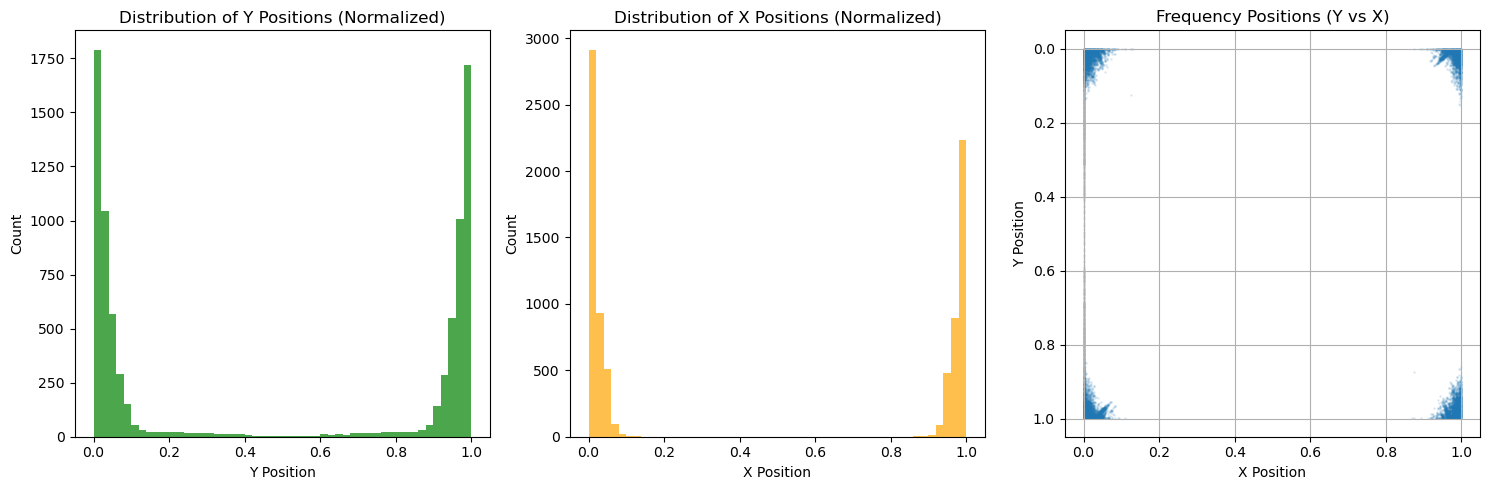

In [6]:
# Analysis of Positions
y_pos = positions[:, 0]
x_pos = positions[:, 1]

# Filter out padding (-1) if any
valid_mask = y_pos != -1
y_pos = y_pos[valid_mask]
x_pos = x_pos[valid_mask]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y_pos, bins=50, color='green', alpha=0.7)
plt.title("Distribution of Y Positions (Normalized)")
plt.xlabel("Y Position")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(x_pos, bins=50, color='orange', alpha=0.7)
plt.title("Distribution of X Positions (Normalized)")
plt.xlabel("X Position")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.scatter(x_pos, y_pos, alpha=0.1, s=1)
plt.title("Frequency Positions (Y vs X)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.gca().invert_yaxis() # Image coordinates usually have Y going down
plt.grid(True)

plt.tight_layout()
plt.show()

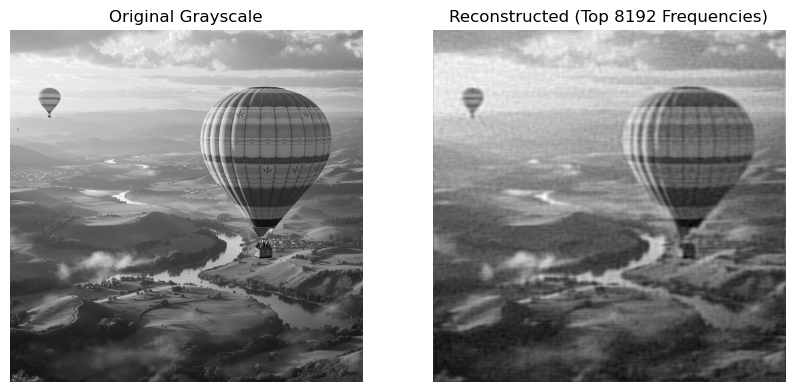

In [8]:
# Reconstruct image
reconstructed_img = utils.reconstruct_image(values, positions, img_array.shape)

# Display comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title(f"Reconstructed (Top {k} Frequencies)")
plt.axis('off')
plt.show()

In [9]:
ds = load_dataset("laion/flux-ultra-stockimages", split="train[:1%]")

In [10]:
ds["__key__"][:10]

['storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/0401',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/8356',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/9964',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/5903',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/6464',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/9053',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/8613',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/1704',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/6418',
 'storage/spirit-zfs/fluxultra-stockphotos/images-jpg/29/1413']